# Week 5 Assignment - Sentiment Classifier

We have provided some synthetic (fake, semi-randomly generated) twitter data in a csv file named project_twitter_data.csv which has the text of a tweet, the number of retweets of that tweet, and the number of replies to that tweet. We have also words that express positive sentiment and negative sentiment, in the files positive_words.txt and negative_words.txt.

Your task is to build a sentiment classifier, which will detect how positive or negative each tweet is. You will create a csv file, which contains columns for the Number of Retweets, Number of Replies, Positive Score (which is how many happy words are in the tweet), Negative Score (which is how many angry words are in the tweet), and the Net Score for each tweet. At the end, you upload the csv file to Excel or Google Sheets, and produce a graph of the Net Score vs Number of Retweets.

In [67]:
punctuation_chars = ["'", '"', ",", ".", "!", ":", ";", '#', '@']

# list of positive words to use
positive_words = []

# populate positive_words list with data in txt file
with open("positive_words.txt") as pos_f:
    for lin in pos_f:
        if lin[0] != ';' and lin[0] != '\n':
            positive_words.append(lin.strip())

negative_words = []
with open("negative_words.txt") as pos_f:
    for lin in pos_f:
        if lin[0] != ';' and lin[0] != '\n':
            negative_words.append(lin.strip())

# Takes a word as input and removes punctuation in the word itself
def strip_punctuation(word):
    for char in word:
        if char in punctuation_chars:
            word = word.replace(char, "")
    return word

# strip_punctuation test cases
# print(strip_punctuation("#Amazing"))
# print(strip_punctuation("wow!"))
# print(strip_punctuation("#in.cred..ible!"))
# print(strip_punctuation("wonderful "))

# Takes a string (1 or more sentences) & calculates how many words are positive words
def get_pos(sentences):
    count = 0
    # convert to lowercase for comparison
    lower_sentences = sentences.lower()
    # remember to strip punctuations and split into a list of strings
    cleaned_sentences = strip_punctuation(lower_sentences).split(" ")
    for word in cleaned_sentences:
        if word in positive_words:
            count += 1
    return count

# get_pos test cases
# print(get_pos("what a truly wonderful day it is today! #incredible"))
# print(get_pos("what a truly Wonderful day it is today! #incredible"))
# print(get_pos("what a truly wonderful day it is today"))

# Takes a string (1 or more sentences) & calculates how many words are negative words
def get_neg(sentences):
    count = 0
    # convert to lowercase for comparison
    lower_sentences = sentences.lower()
    # remember to strip punctuations and split into a list of strings
    cleaned_sentences = strip_punctuation(lower_sentences).split(" ")
    for word in cleaned_sentences:
        if word in negative_words:
            count += 1
    return count

# get_neg test cases
# print(get_neg("what a truly wonderful day it is today! #incredible"))
# print(get_neg("The weather truely is abnormal - it's october and already snowing!"))
# print(get_neg("their departure was rather abrupt. However, it was amusing how aloof they had been."))
# print(get_neg("the weather is what it is."))

# opens the file project_twitter_data.csv containing fake generated twitter data
try:
    fh = open("project_twitter_data.csv", "r")
    lines = fh.readlines()
    fh.close()

    # create a new file and prepare to write to it
    file_out = open("resulting_data.csv", "w")

    # write header
    file_out.write("Number of Retweets, Number of Replies, Positive Score, Negative Score, Net Score\n")

    # ignore the first line (header)
    for line in lines[1:]:
        # split line into a list of string: tweet text, no. of retweets, no. of replies. use strip() to remove any \n
        splitted = line.split(",")
        tweet_text = splitted[0].strip()
        retweet_count = splitted[1].strip()
        replies_count = splitted[2].strip()

        # get positive and negative score on the text of the tweet
        positive_score = get_pos(tweet_text)
        negative_score = get_neg(tweet_text)

        # calculate net_score
        net_score = positive_score - negative_score

        # write to file
        file_out.write(str(retweet_count) + "," +
                       str(replies_count) + "," +
                       str(positive_score) + "," +
                       str(negative_score) + "," +
                       str(net_score) + "\n")

    file_out.close()
except Exception as ex:
    print("Unable to open file! " + str(ex))
    quit()

# Sentiment Analysis - Generate scatterplot

In [68]:
### Plot scatterplot
import pandas as pd
import matplotlib.pyplot as plt

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

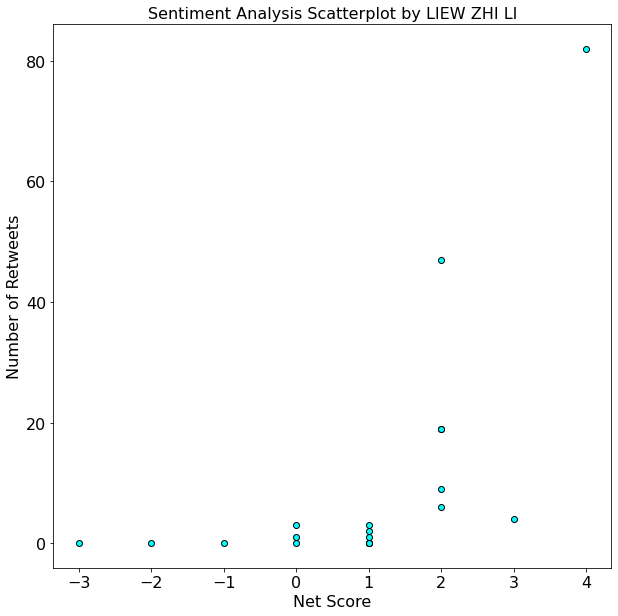

In [69]:
df = pd.read_csv("resulting_data.csv")
x = df[' Net Score']
y = df['Number of Retweets']

plt.figure(figsize=(10,10))
plt.scatter(x, y, edgecolors='black', color="cyan")
plt.xlabel('Net Score')
plt.ylabel('Number of Retweets')
plt.title('Sentiment Analysis Scatterplot by LIEW ZHI LI')

# save image before calling show
plt.savefig('plot.png')
plt.show()